In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline
sns.set_style("whitegrid")

# HEATMAPS

load data

In [2]:
# confusion matrix
confusion = np.array([[37, 0,  0,  0,  0,  0,  0,  0,  0,  0],
                      [0, 39,  0,  0,  0,  0,  1,  0,  2,  1],
                      [0,  0, 41,  3,  0,  0,  0,  0,  0,  0],
                      [0,  0,  0, 44,  0,  0,  0,  0,  1,  0],
                      [0,  0,  0,  0, 37,  0,  0,  1,  0,  0],
                      [0,  0,  0,  0,  0, 46,  0,  0,  0,  2],
                      [0,  1,  0,  0,  0,  0, 51,  0,  0,  0],
                      [0,  0,  0,  1,  1,  0,  0, 46,  0,  0],
                      [0,  3,  1,  0,  0,  0,  0,  0, 44,  0],
                      [0,  0,  0,  0,  0,  1,  0,  0,  2, 44]])

In [5]:
confusion = pd.DataFrame(confusion, index=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'])

In [6]:
confusion

,0,1,2,3,4,5,6,7,8,9
A,37,0,0,0,0,0,0,0,0,0
B,0,39,0,0,0,0,1,0,2,1
C,0,0,41,3,0,0,0,0,0,0
D,0,0,0,44,0,0,0,0,1,0
E,0,0,0,0,37,0,0,1,0,0
F,0,0,0,0,0,46,0,0,0,2
G,0,1,0,0,0,0,51,0,0,0
H,0,0,0,1,1,0,0,46,0,0
I,0,3,1,0,0,0,0,0,44,0
J,0,0,0,0,0,1,0,0,2,44


Text(0.5, 43.0, 'Predicted Label')

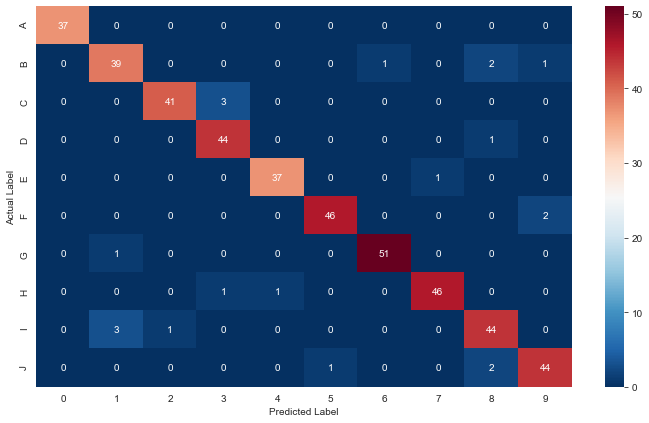

In [8]:
plt.figure(figsize=(12,7))
sns.heatmap(confusion, annot=True, cmap='RdBu_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

seaborn with qualitative colormap

Text(0.5, 43.0, 'Predicted Label')

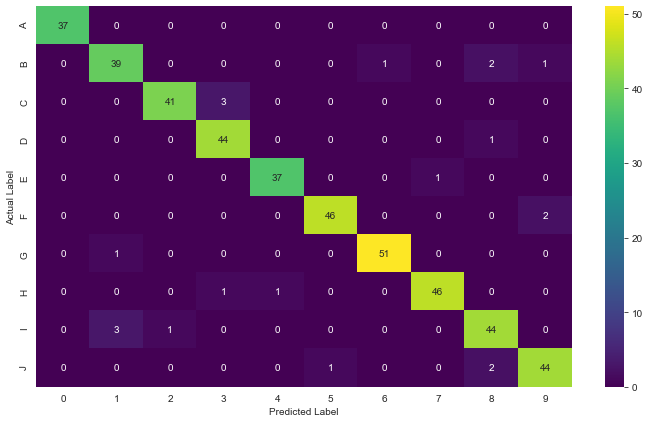

In [9]:
plt.figure(figsize=(12,7))
sns.heatmap(confusion, annot=True, cmap='viridis')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

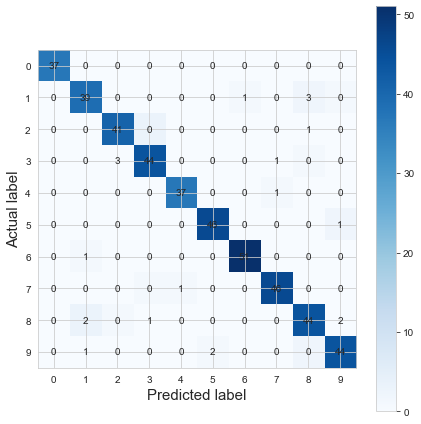

In [10]:
# this is a lot of code that is not trivial to create
plt.figure(figsize=(6,6))
plt.imshow(confusion, interpolation='nearest', cmap='Blues')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = confusion.shape

for x in range(width):
    for y in range(height):
        plt.annotate(str(confusion[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

# HISTOGRAMS

load data

In [13]:
df = pd.read_csv('data/KingCountyHouseData.csv')
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [14]:
df.price.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

<AxesSubplot:>

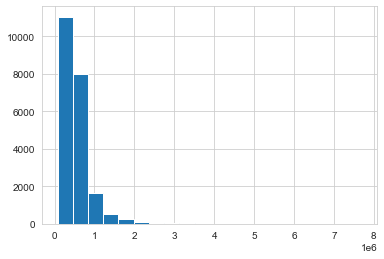

In [17]:
df.price.hist(bins=20)

(array([-1000000.,        0.,  1000000.,  2000000.,  3000000.,  4000000.,
         5000000.,  6000000.,  7000000.,  8000000.,  9000000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

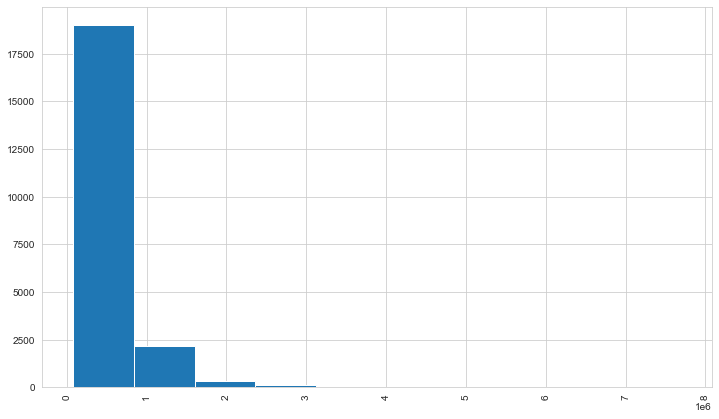

In [20]:
plt.figure(figsize=(12,7))
df.price.hist()
plt.xticks(rotation=90)

<AxesSubplot:>

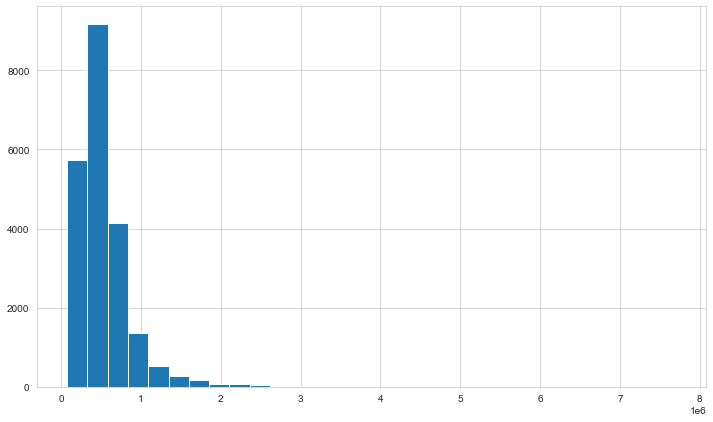

In [22]:
plt.figure(figsize=(12,7))
df.price.hist(bins=30)

<AxesSubplot:>

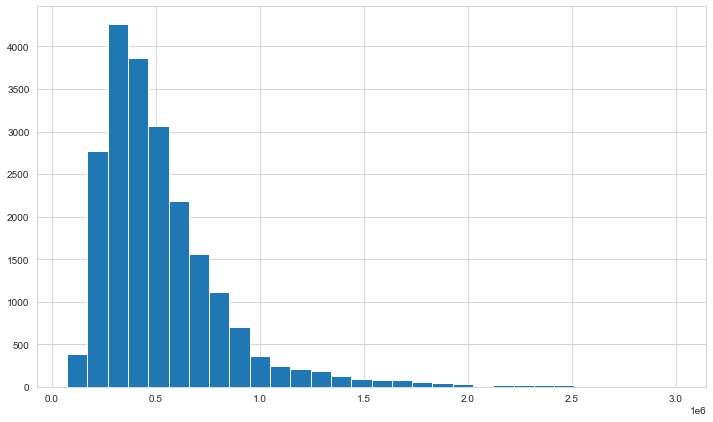

In [24]:
# visualizing a subset of the data
plt.figure(figsize=(12,7))
price_filter = df.loc[:, 'price'] <=3000000
df.loc[price_filter, 'price'].hist(bins=30)

<AxesSubplot:>

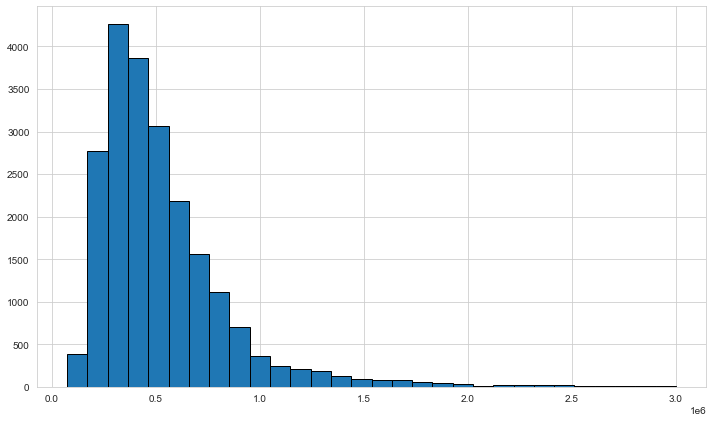

In [26]:
plt.figure(figsize=(12,7))
price_filter = df.loc[:, 'price'] <=3000000
df.loc[price_filter, 'price'].hist(bins=30, edgecolor='black')

In [12]:
from sklearn.datasets import load_digits

In [18]:
# create data
digits = load_digits()

In [27]:
type(digits)

sklearn.utils.Bunch

In [28]:
df = pd.DataFrame(list(digits.data))

In [30]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [31]:
label_df = pd.DataFrame(list(digits.target), columns=['label'])

In [32]:
label_df

,label
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


In [33]:
df = pd.concat([df, label_df], axis=1)

In [35]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [36]:
df.to_csv('data/digits.csv', index=False)

In [37]:
df.shape

(1797, 65)

subplots

In [38]:
df = pd.read_csv('data/digits.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [39]:
# show image
pixel_colnames = df.columns[:-1]
pixel_colnames

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63'],
      dtype='object')

In [42]:
image_values = df.loc[0, pixel_colnames].values.reshape((8, 8))

In [43]:
image_values.shape

(8, 8)

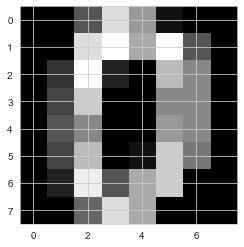

In [46]:
plt.imshow(image_values, cmap='gray')

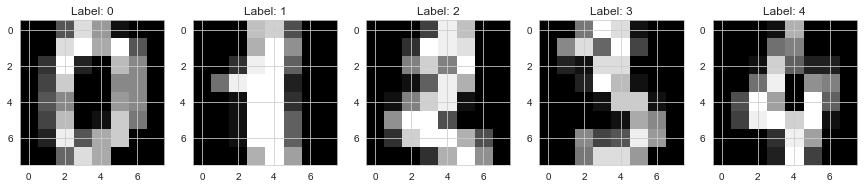

In [49]:
plt.figure(figsize=(15,10))
for i in range(0, 5):
    plt.subplot(1, 5, 1 + i)
    image_values = df.loc[i, pixel_colnames].values
    image_label = df.loc[i, 'label']
    plt.imshow(image_values.reshape(8, 8), cmap='gray')
    plt.title('Label: ' + str(image_label))
   

In [53]:
help(pd.DataFrame.index)

Help on AxisProperty:

    The index (row labels) of the DataFrame.



In [54]:
help(pd.DataFrame.columns)

Help on AxisProperty:

    The column labels of the DataFrame.



In [55]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
